# Finding Where Logerror is Coming From.

### Brought to you by Liam Jackson and Caitlyn Carney

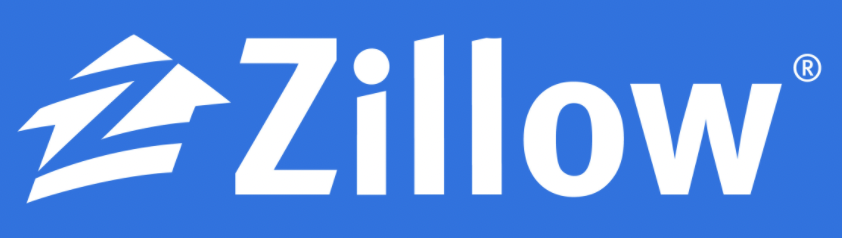

### What has brought us here today?

Log Error. Log error is based on the log of our Zestimate price minus the actual sales price of a home. But what is causing our errors? Thats what we are here to find out!

___

### What we hope to achieve
- Uncovering the drivers of the error in the Zestimate.
- Create recommendations on how to minimize log error.

___

### What we initially hypothesized
- The stuctures age effects log error .
    - A homes age may make someone think that it is of lower quality but it may have been refurbished causeing a under valued home.
- Latitude and Longitude are drivers of log error.
    - Regions may be a higher priced area versus another.
- A homes quality is probably effecctiing logerror 
    - Because, homes with a lower quality may be being priced way undervalued.
- Tax vlaues may be affecting logerror.
    - Not all home prices are directly correlated to tax values. Although it is affects the price it does not lead to an exact number.

___

### What we ended up finding

- We have 46,416 accurate home values and 4,791 which are inaccurate.
    - Only about 9.36% are innacurate overall.
- The majority of way under valued homes come from homes with a quality of 0.
- The majority of over valued homes are older and of lower quality.
- Homes with a low to medium structure tax value and a low land tax value tend to have a higher logerror than other homes.
- North Downtown LA have no homes that have no undervalued homes.
- Overall North Downtown LA has lowest logerror out of all areas in Southern California
- Homes in Ventura are more often overvalued compared to their surrounding areas.

___

### What we learned from our findings

After breaking down our selected features we learned that only certain parts of structure and land tax value,  latitude, longitude, quality, etc. Had a larger contribution to log error than others.

By taking these broken up parts we were able to narrow down what may be causing log error.

___

### Our recommendation for you

We would suggest using our OLS model to be used within the field, in order to establish a closer zestimate score to what the selling price may be.

We also recommend taking a further look into these fetures to see if there is an underlining reason as to why they may be affecting log error. 
- Such as creating new features to see tax ratios between structure and land tax values.
- Breaking down the geographical region to see if there is a more specific area contributing to log error.

___

## Import Needed Materials

In [1]:
import pandas as pd
import wrangle
import explore
from sklearn.cluster import KMeans

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


___

## Acquire Data

We acquire this data using the Zillow database found in the Codeup sequel server.

We joined specific tables onto our main data set (properties_2017). We also made specific parameters, within sequel, to fit our teams needs for this project.

In [2]:
df = wrangle.get_zillow_data()

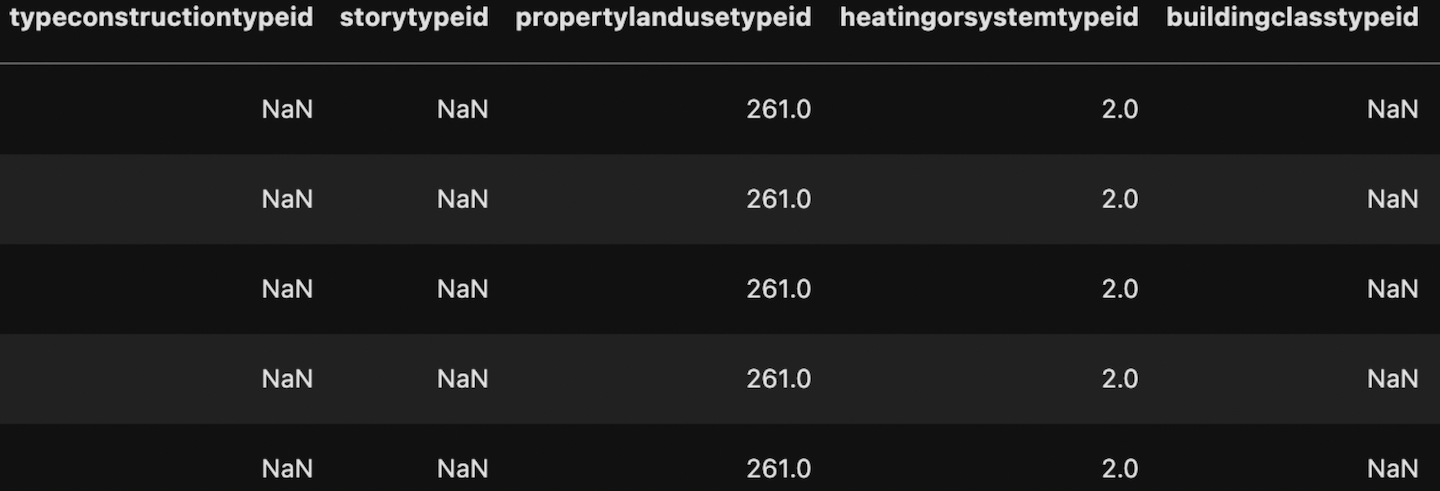

What's wrong with this?
- There are WAY to many missing values.
- The column names are sometimes too long and pushed together.
- Some columns are not helpful for what we need the data for.

___

## Clean the Data

In [3]:
df = wrangle.clean_zillow(df)

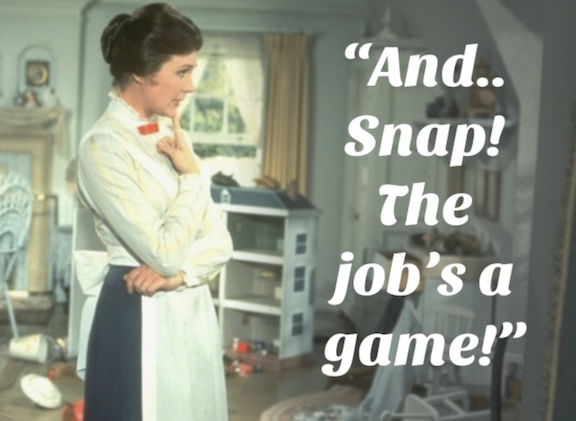

It actually wasn't as fast as a **snap**, it took some time.

In order to make the data work for us, like Ms.Poppins made the toys clean themselves, we had to put in some work.

- Here we:
    - Dop columns and rows with 50% or more null values 
    - Replace NULL values
    - Encode features
    - Create new features
    - Drop features
    - Rename features
    - Turn some features into binary features
    - Change some features to integers
    - Handle outliers
        - Using IQR rule
    - Bin some larger features

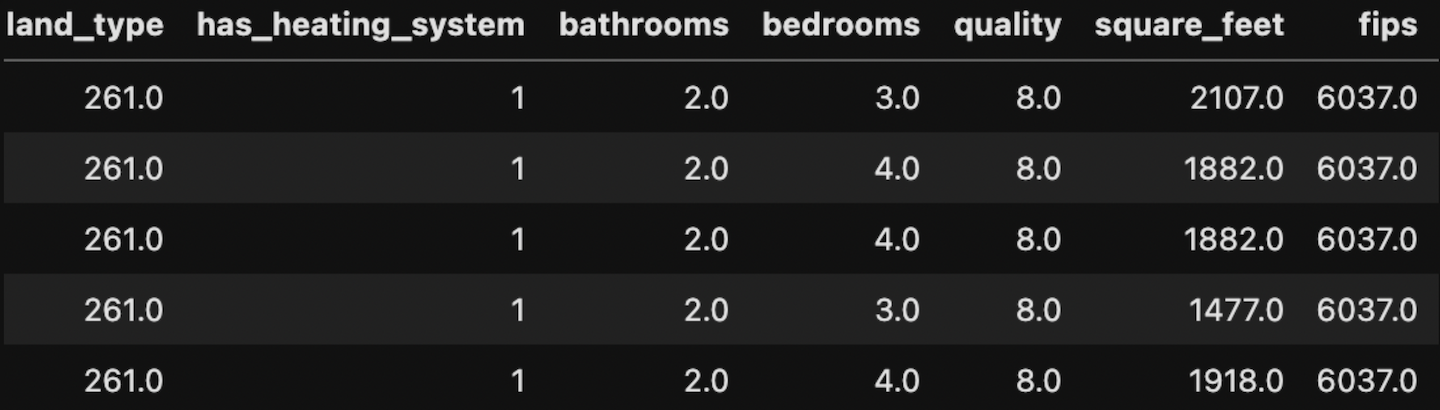

___

- From there we :
    - Split the data into train, validate, and test
    - Split train, validate, and test into X and y
    - Scaled the data
    
For further detail on the code used for cleaning, splitting, and scaling please see our wrangle.py found in our github repository.

In [4]:
train, validate, test = wrangle.split_zillow(df)

In [5]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test)

___

# Let's Start Exploring!

### Explore Logerror

To start things off we needed to take a look at our log error. 
- How often are we acccurate? How often are we slightly over? Under? How about how often we are way off? 

*That is what we aimed to answer here.*

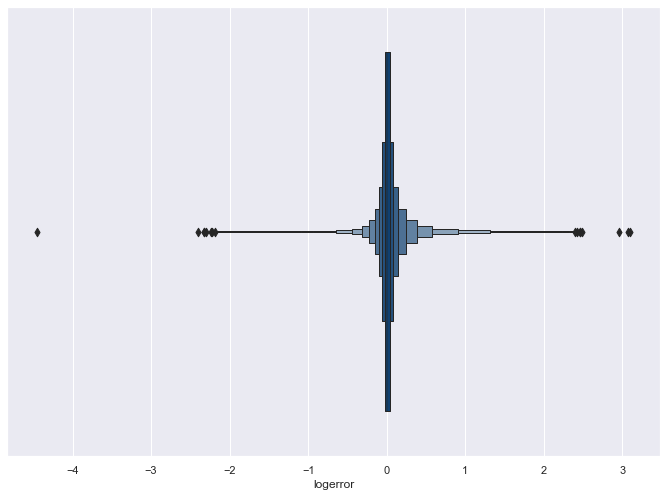

In [6]:
explore.explore_logerror(train)

Above we can see that there does seem to be a lot of accuracy with some error with our target variable. But how much of this accurate versus inaccurate?

- We found that there are far more accurate readings then inaccurate readings.
    - Accurate readings
        - 46,416 total
    - All other readings
        - 4,791 total

This means that only ~9.36% of our log error is inaccurate.

___

# Offically Exploring!

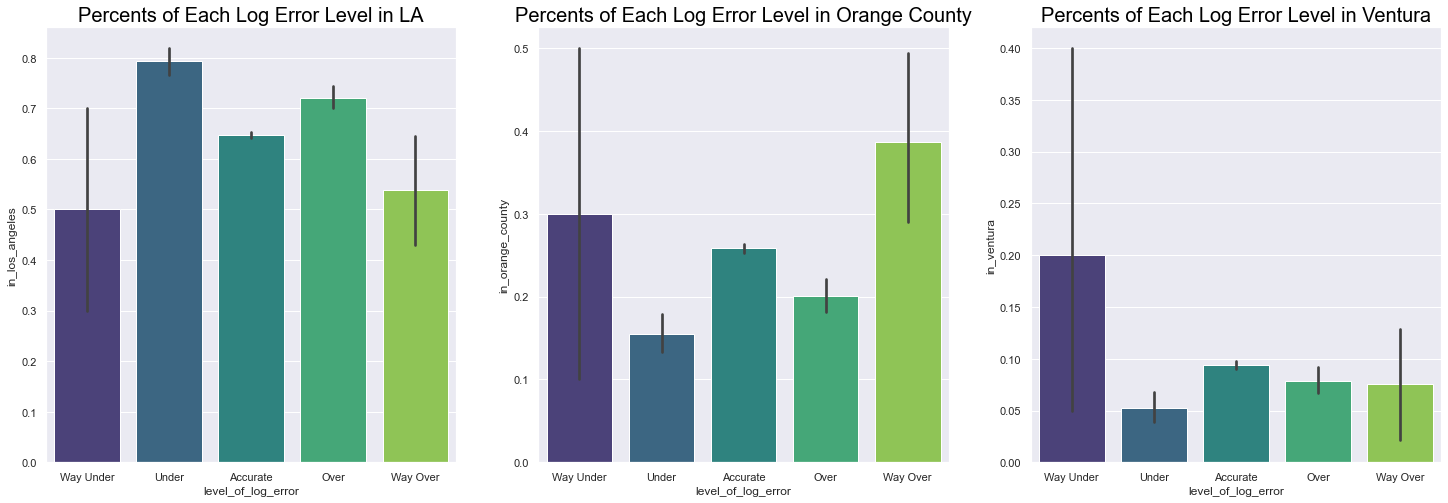

In [7]:
explore.log_error_deep_dive(train)

Above we found that the percentage of our log errors in different counties is:

- Majority of under values homes are in LA.
- Majority of Over valued homes are in Oragne County.
- Majority of Way under valued homes are in Ventura..

This leads us the believe that there may not be just one driver of logerror. Many features may be driving the log error we do have, together.

- **Accurate Percentages** (between -.15 and 0.15)
    - ~69% in Los Angeles
    - ~23% in Oragne County
    - ~8% in Ventura
- **Over Percentages** (between 0.15 and 1)
    - ~75% in Los Angeles
    - ~18% in Oragne County
    - ~7% in Ventura
- **Way Under Percentages** (between -1 and -5)
    - ~67% in Los Angeles
    - ~12% in Oragne County
    - ~21% in Ventura
- **Under Percentages** (between -0.15 and -1)
    - ~81% in Los Angeles
    - ~14% in Oragne County
    - ~5% in Ventura
- **Way Over Percentages** (between 1 and 5)
    - ~52% in Los Angeles
    - ~38% in Oragne County
    - ~10% in Ventura

___

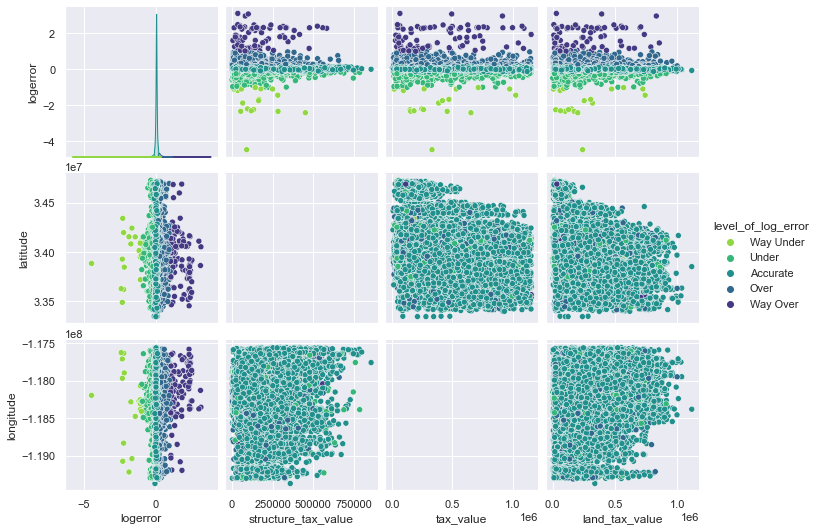

In [8]:
explore.logerror_pairplot(train)

# Takeaways
- Struture and land tax values have a fair amount of "Way Over" valued homes and a slight amount of "Way Under" valued homes.
- Latitude and longitude tend to have more way over valued homes compared to the other features. 

This leads us to believe that we may have success diving further into these features.



___

# Cluster Exploration

## Lets cluster using qulity, house age, and room count

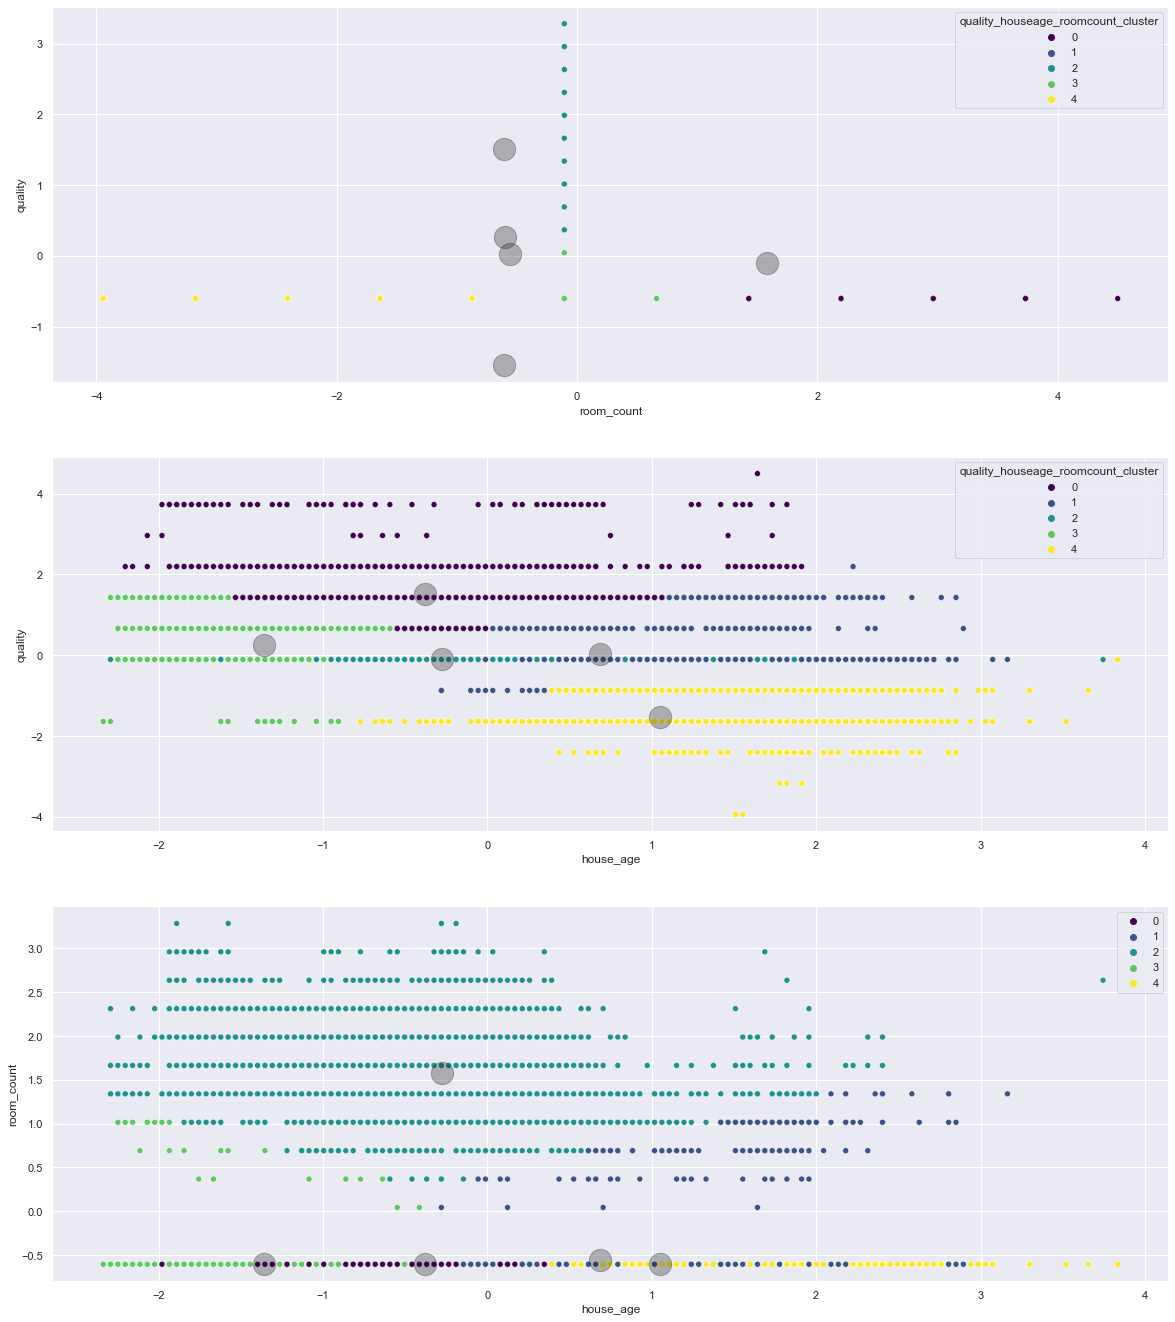

<Figure size 1008x648 with 0 Axes>

In [10]:
explore.quality_age_room_count_cluster(train)

## Takeaways:
-  We discoved that without using a swarm plot we could not use quality and room count cluster. (took too long to run)
- We decided to look at the clusters for house age and quality.

___

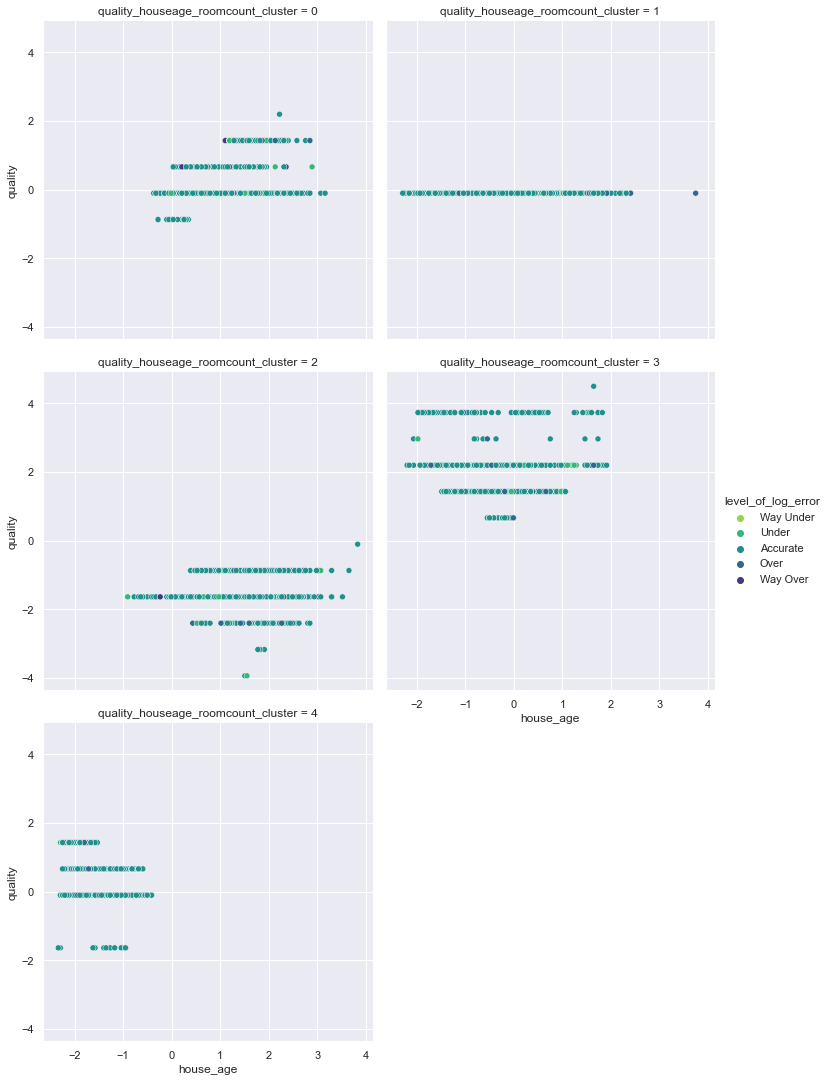

In [11]:
explore.quality_age_room_count_relplot(train)

## Takeaways:
- 0 =  Older Homes High Quality
- 1 =  Home Quality = 0
- 2 =  Older Homes Low Quality
- 3 =  Newer Homes High Quality
- 4 =  Younger Homes Avg. Quality

___

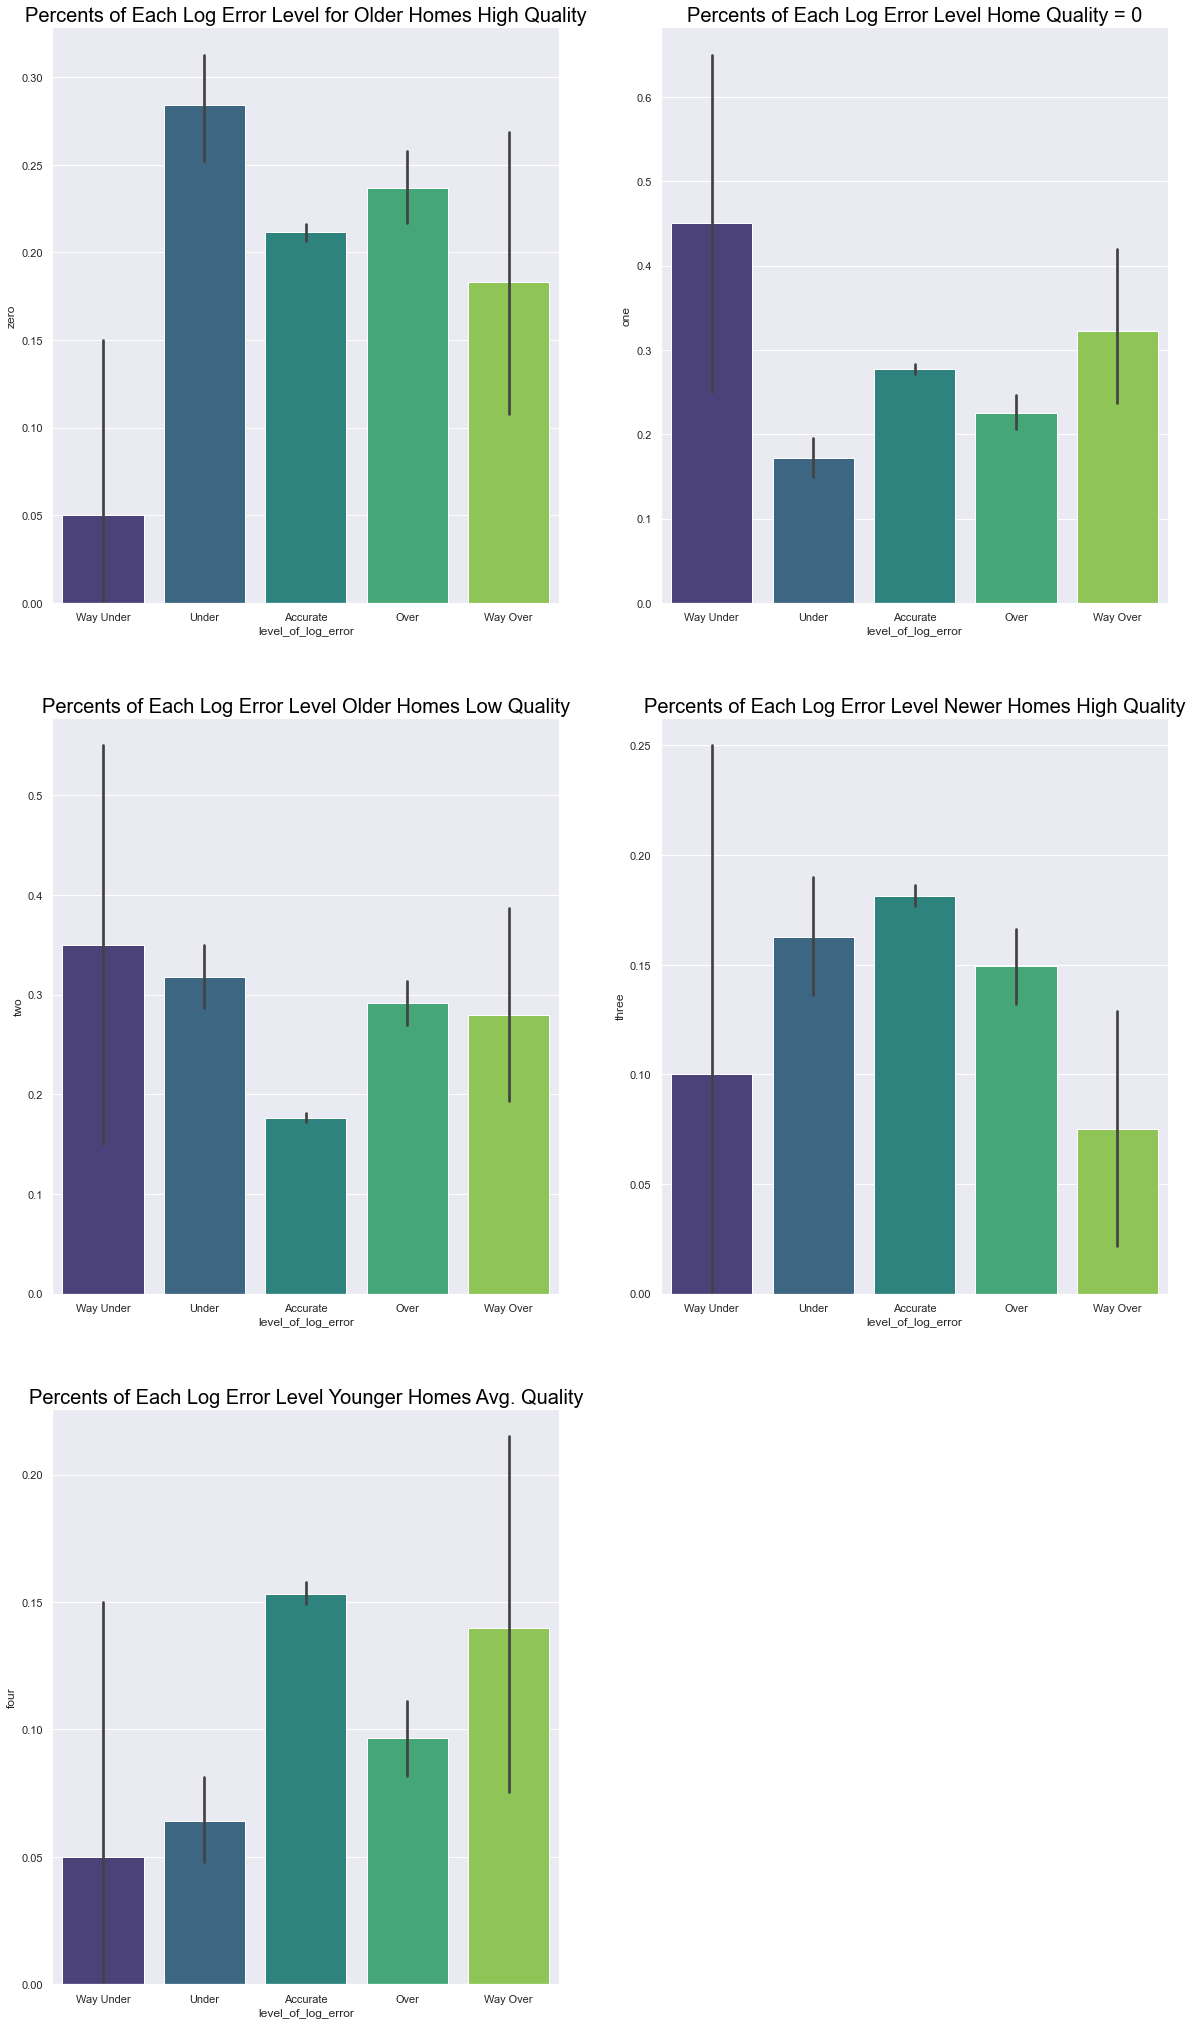

In [12]:
explore.get_dum_and_plot(train)

### Takeaways
- Majority of Way Under valued homes are homes with a quality score of 0

- Majority of Way Over valued homes are Old Homes with Low quality. and Homes with Quality of 0. (This makes up roughly 60% of all Overvalued homes in S-Cal)

- Older Homes with Lower Quality are mostly Under valued
- Newer Homes with High Quality and Newer Homes with Avg. Quality are mostly accurate with low levels of Way Under and Way Over values of Log error. 

___

### From here we ran some tests.

We started with the Anova test where we rejected the null hypothesis that: 
- "There is no real difference between the log error means of each individual cluster."

We than ran a t-test to find out which clusters were more important to logerror.
- By doing this we decided to keep:
    - Home Quality = 0
    - Newer Homes High Quality
    - Older Homes High Quality
    
From our tests these 3 clusters should have an effect on log error.

___

## Lets Cluster Using Structure Tax Value and Land Tax Value

<Figure size 1008x648 with 0 Axes>

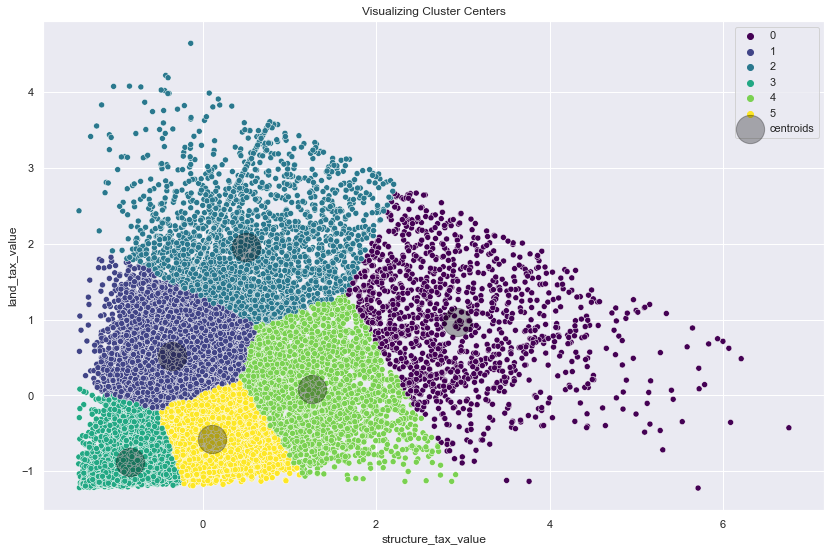

In [13]:
explore.taxes_cluster(train)

___

<Figure size 1008x648 with 0 Axes>

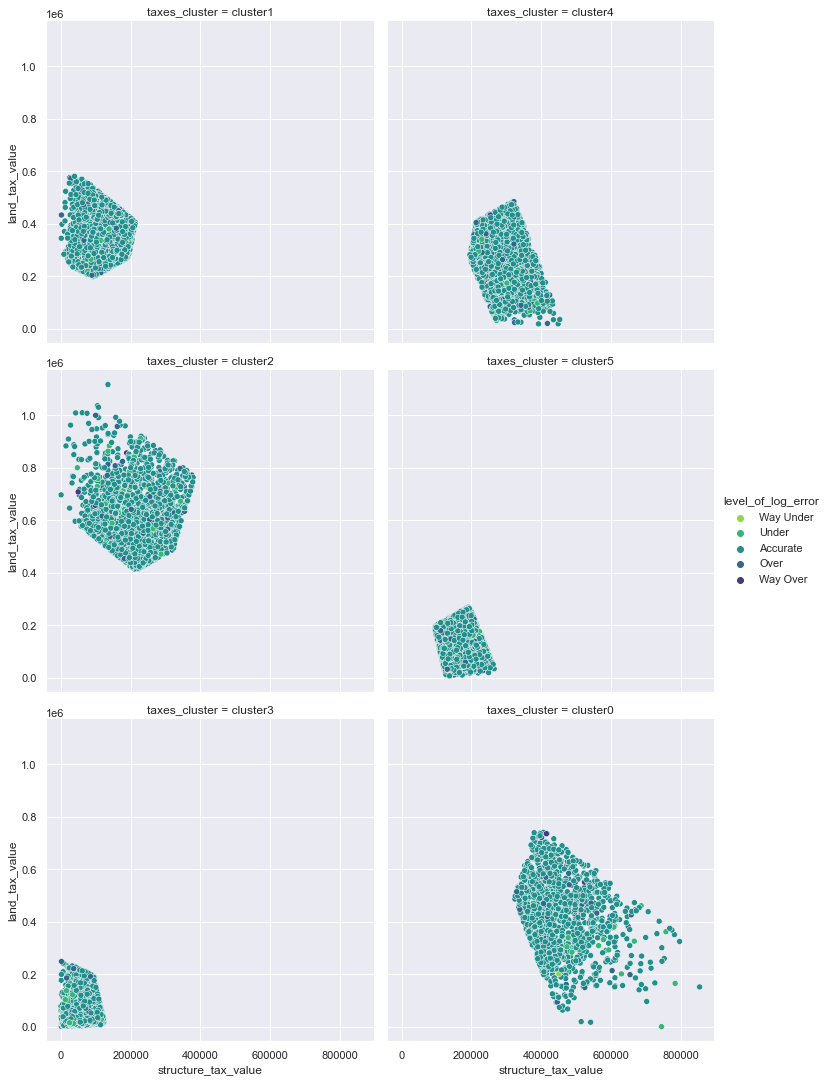

In [14]:
explore.taxes_relplot(train)

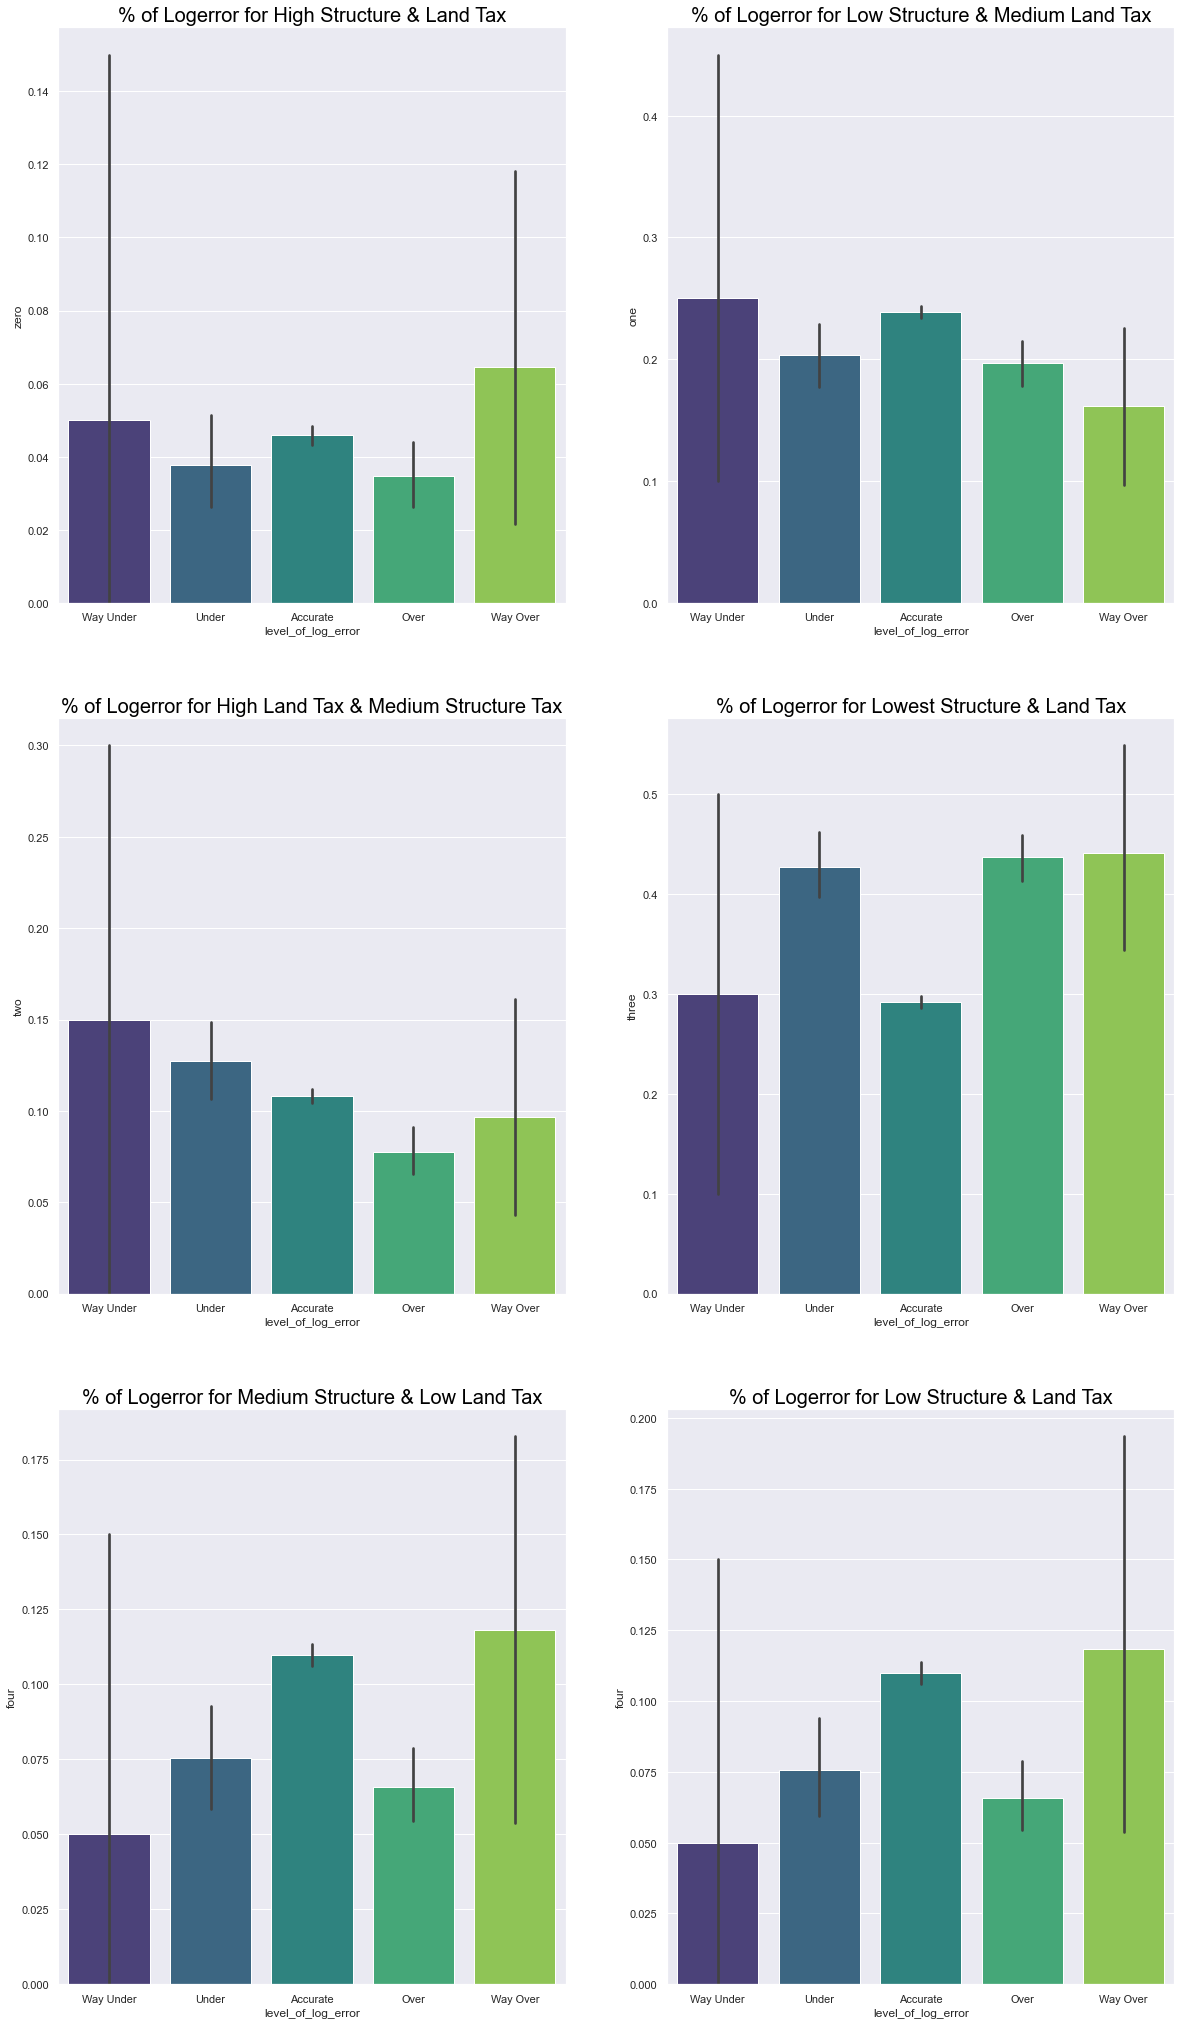

In [15]:
explore.get_taxes_hist(train)

### Takeaways
- Homes with the lowest amount of land and structure tax have a muchhigher percentage of each level of log error.
    - With under over, and way over being above 40%.
- Homes with low structure and medium land tax tend to have a higher percentage of log errors than the other clusters.

___

### From here we ran some tests.

We started with the Anova test where we rejected the null hypothesis that: 
- "There is no real difference between the log error means of each individual cluster."

We than ran a t-test to find out which clusters were more important to logerror.
- By doing this we decided to keep:
    - low structure and low land tax value
    - low structure and medium land tax value
    
From our tests these two clusters should have an effect on log error.

___

## Lets Cluster Latitude, Longitude, and House Age

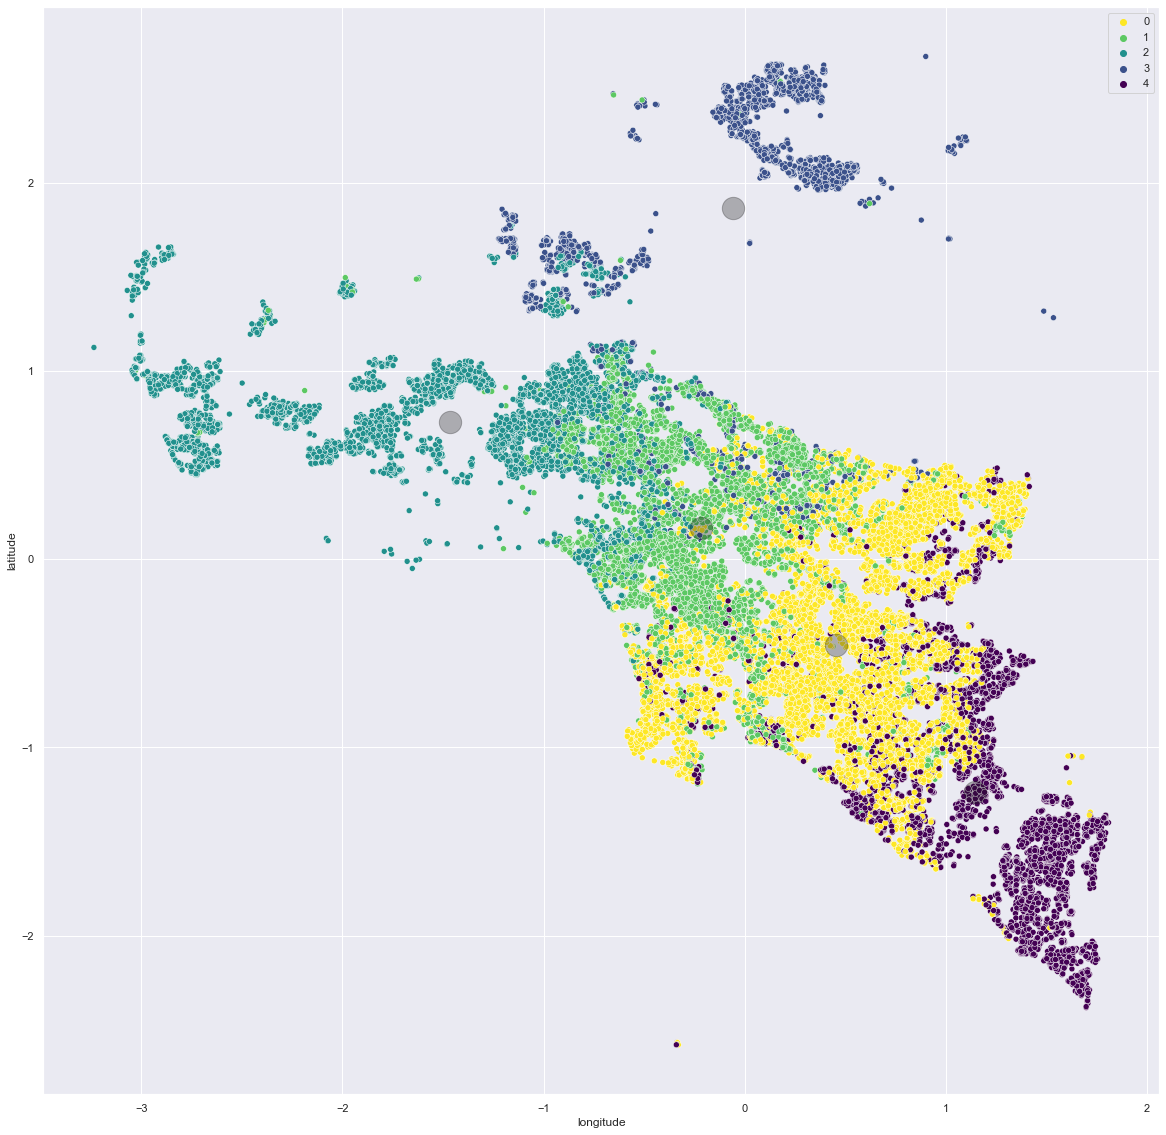

In [16]:
explore.cluster_longitude_latitude_houseage(train)

### Takeaways
- 0 = East LA
- 1 = North Downtown LA 
- 2 = Ventura County
- 3 = North LA 
- 4 = Orange County


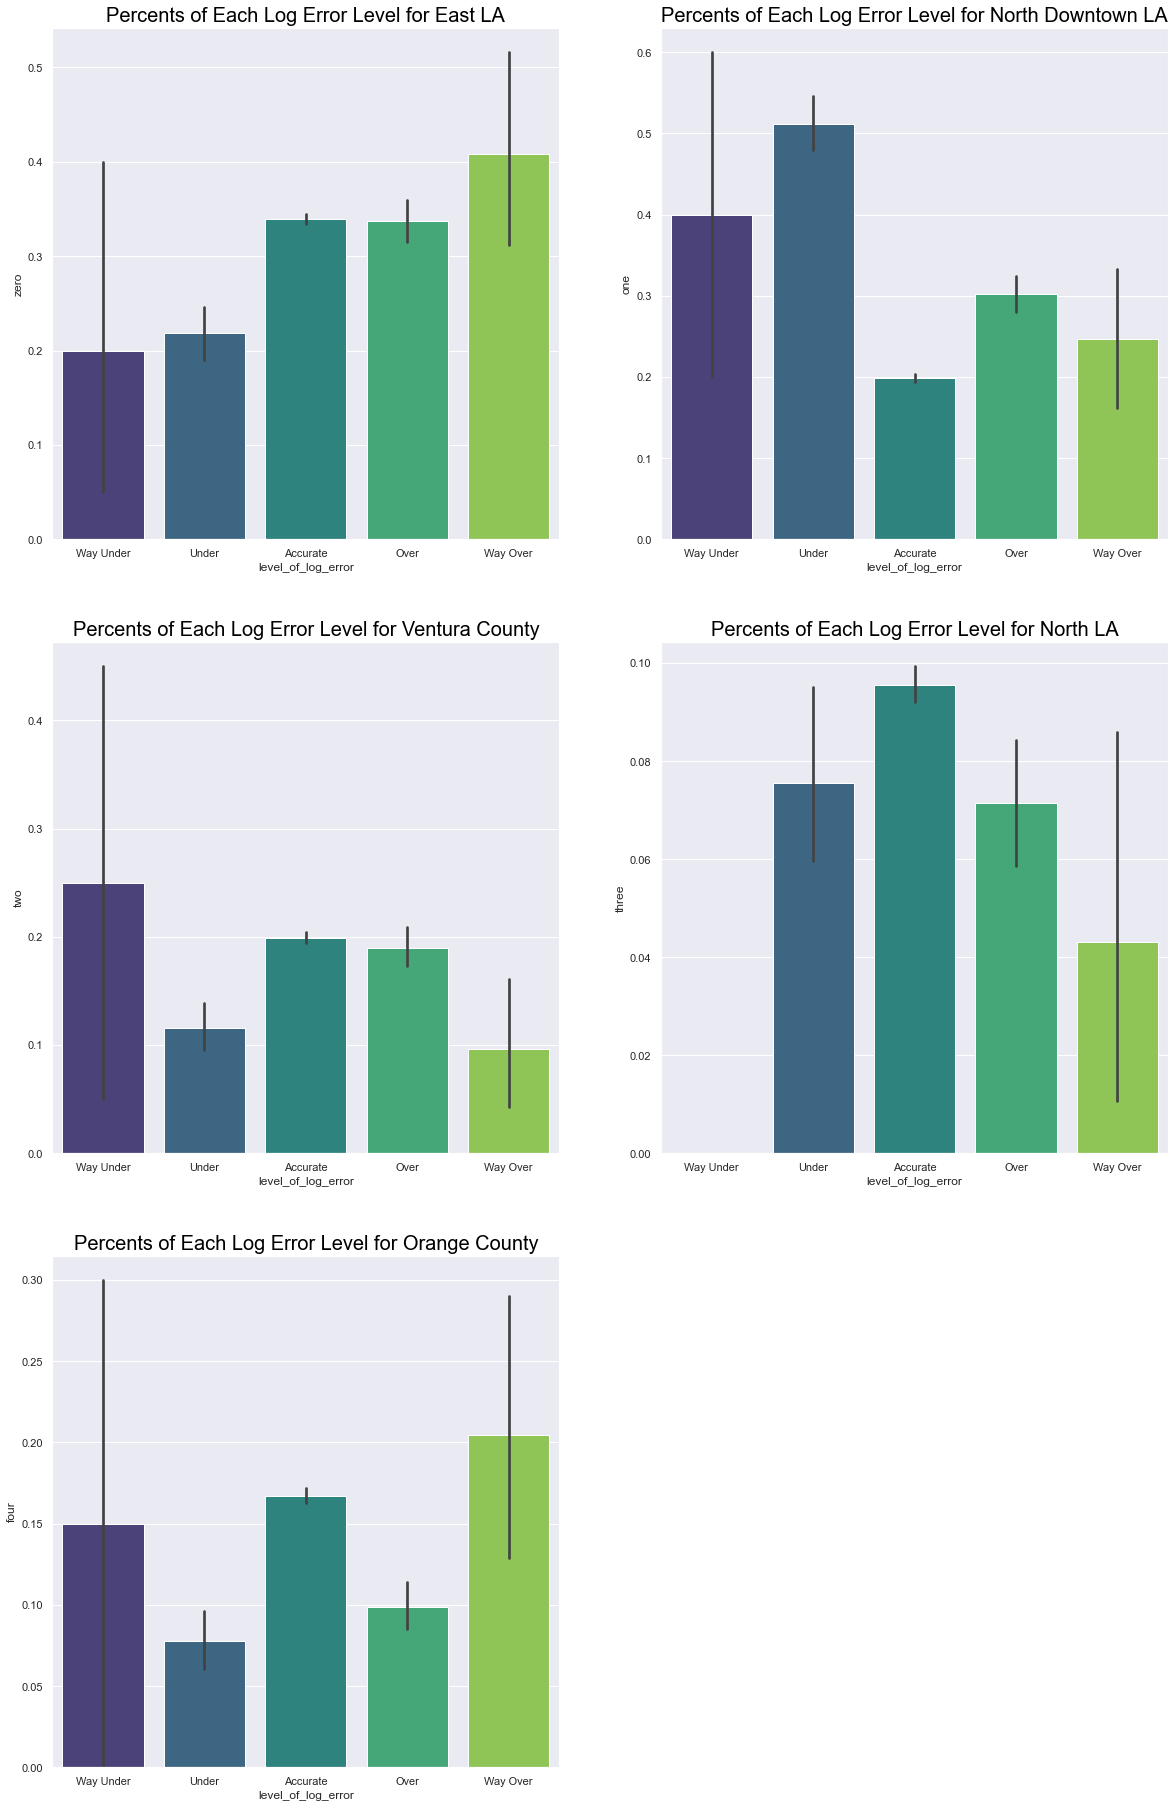

In [17]:
explore.get_dum_and_plot2(train)

## Takeaways
- Homes in East LA make up roughly 42% of all over valued homes in S-Cal.

- East LA homes are mostly Way Over Valued while homes in Ventura County are mostly Way Under Valued.

- Orange County has a majority of Way Over valued homes. 

- North LA seems to not have any Way under valued homes with the majority of homes being accurate. 

___

### From here we ran some tests.

We started with the Anova test where we rejected the null hypothesis that: 
- "There is no real difference between the log error means of each individual cluster."

We than ran a t-test to find out which clusters were more important to logerror.
- By doing this we decided to keep:
    - Ventura County
    - North Downtown LA
    
From our tests these 2 clusters should have an effect on log error.

___

# Let's Model These Bad Boys

But we need to focus our data on what we think is causing logerror.

___

### Get dummies for clusters affecting log error from our quality, house age, and room count clustering:

In [18]:
kmeans = KMeans(n_clusters=5, random_state=123)

# identify columns we want to cluster on
cluster_cols = ['quality', 'house_age', 'room_count']

# clustering on train, getting the cetnoids
kmeans = kmeans.fit(train[cluster_cols])

# identifying clusters in train
train['quality_houseage_roomcount_cluster'] = kmeans.predict(train[cluster_cols])
# identifying clusters in validate, test
validate['quality_houseage_roomcount_cluster'] = kmeans.predict(validate[cluster_cols])
test['quality_houseage_roomcount_cluster'] = kmeans.predict(test[cluster_cols])

def predict_cluster(some_dataframe):
    some_dataframe['quality_houseage_roomcount_cluster'] = kmeans.predict(some_dataframe[cluster_cols])
    return some_dataframe

def get_dummy_quality_houseage_roomcount_cluster(some_dataframe):
    dummy_df =  pd.get_dummies(some_dataframe['quality_houseage_roomcount_cluster'])
    dummy_df.columns = ['house quality = 0', 
                    'Older homes low quality', 
                    'Younger homes avg. quality', 
                    'Newer Homes High Quality', 
                    'Older Homes High Quality']
    some_dataframe = pd.concat([some_dataframe, dummy_df], axis=1)
    some_dataframe = some_dataframe.drop(['Older homes low quality', 
                    'Younger homes avg. quality', 
                    'quality_houseage_roomcount_cluster'], axis=1)
    return some_dataframe

def prep_quality_houseage_roomcount_clusters(some_dataframe):
    some_dataframe = predict_cluster(some_dataframe)
    some_dataframe = get_dummy_quality_houseage_roomcount_cluster(some_dataframe)
    return some_dataframe

In [19]:
train = prep_quality_houseage_roomcount_clusters(train)
validate = prep_quality_houseage_roomcount_clusters(validate)
test = prep_quality_houseage_roomcount_clusters(test)

___

### Get dummies for clusters affecting log error from our taxes clustering:

In [20]:
kmeans = KMeans(n_clusters=6, random_state=123)
# identify columns we want to cluster on
cluster_cols = ['structure_tax_value', 'land_tax_value']
# clustering on train, getting the cetnoids
kmeans = kmeans.fit(train[cluster_cols])
# identifying clusters in train
train['taxes_cluster'] = kmeans.predict(train[cluster_cols])
# identifying clusters in validate, test
validate['taxes_cluster'] = kmeans.predict(validate[cluster_cols])
test['taxes_cluster'] = kmeans.predict(test[cluster_cols])

In [21]:
def predict_cluster_taxes(some_dataframe):
    some_dataframe['taxes_cluster'] = kmeans.predict(some_dataframe[cluster_cols])
    return some_dataframe

def get_dummy_taxes_cluster(some_dataframe):
    dummy_df =  pd.get_dummies(some_dataframe['taxes_cluster'])
    dummy_df.columns = ['low_structure_and_land_tax', 'drop1',
                        'drop2', 'medium_structure_low_land_tax', 
                        'drop4', 'drop5']
    some_dataframe = pd.concat([some_dataframe, dummy_df], axis=1)
    some_dataframe = some_dataframe.drop(['drop1', 'drop2', 'drop4', 'drop5', 'taxes_cluster'], axis=1)
    return some_dataframe

def prep_taxes_clusters(some_dataframe):
    some_dataframe = predict_cluster_taxes(some_dataframe)
    some_dataframe = get_dummy_taxes_cluster(some_dataframe)
    return some_dataframe

In [22]:
train = prep_taxes_clusters(train)
validate = prep_taxes_clusters(validate)
test = prep_taxes_clusters(test)

___

### Get dummies for clusters affecting log error from our latitude, longitude, and house age clustering:

In [23]:

kmeans = KMeans(n_clusters=5, random_state=123)
# identify columns we want to cluster on
cluster_cols = ['latitude', 'longitude', 'house_age']
# clustering on train, getting the cetnoids
kmeans = kmeans.fit(train[cluster_cols])
# identifying clusters in train
train['longitude_latitude_houseage_cluster'] = kmeans.predict(train[cluster_cols])
# identifying clusters in validate, test
validate['longitude_latitude_houseage_cluster'] = kmeans.predict(validate[cluster_cols])
test['longitude_latitude_houseage_cluster'] = kmeans.predict(test[cluster_cols])

def predict_cluster_longitude_latitude_houseage(some_dataframe):
    some_dataframe['longitude_latitude_houseage_cluster'] = kmeans.predict(some_dataframe[cluster_cols])
    return some_dataframe

def get_dummy_longitude_latitude_houseage_cluster(some_dataframe):
    dummy_df =  pd.get_dummies(some_dataframe['longitude_latitude_houseage_cluster'])
    dummy_df.columns = ['Ventura', 'Orange County', 
                    'North downtown LA', 'East downtown LA', 
                    'North LA']
    some_dataframe = pd.concat([some_dataframe, dummy_df], axis=1)
    some_dataframe = some_dataframe.drop(['Orange County', 'East downtown LA', 
                    'North downtown LA', 'longitude_latitude_houseage_cluster'], axis=1)
    return some_dataframe

def prep_longitude_latitude_houseage_clusters(some_dataframe):
    some_dataframe = predict_cluster_longitude_latitude_houseage(some_dataframe)
    some_dataframe = get_dummy_longitude_latitude_houseage_cluster(some_dataframe)
    return some_dataframe

In [24]:
train = prep_longitude_latitude_houseage_clusters(train)
validate = prep_longitude_latitude_houseage_clusters(validate)
test = prep_longitude_latitude_houseage_clusters(test)

___

### Now to focus our data on these new features!

In [25]:
train, validate, test = wrangle.focused_zillow(train, validate, test)

In [26]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test)

___

### First we needed to established a baseline accuracy to work with.

We decided to move forward with a median Baseline which had:
- RMSE in sample of 0.16
- RMSE out of sample of 0.15

___

### Then we had to choose a model

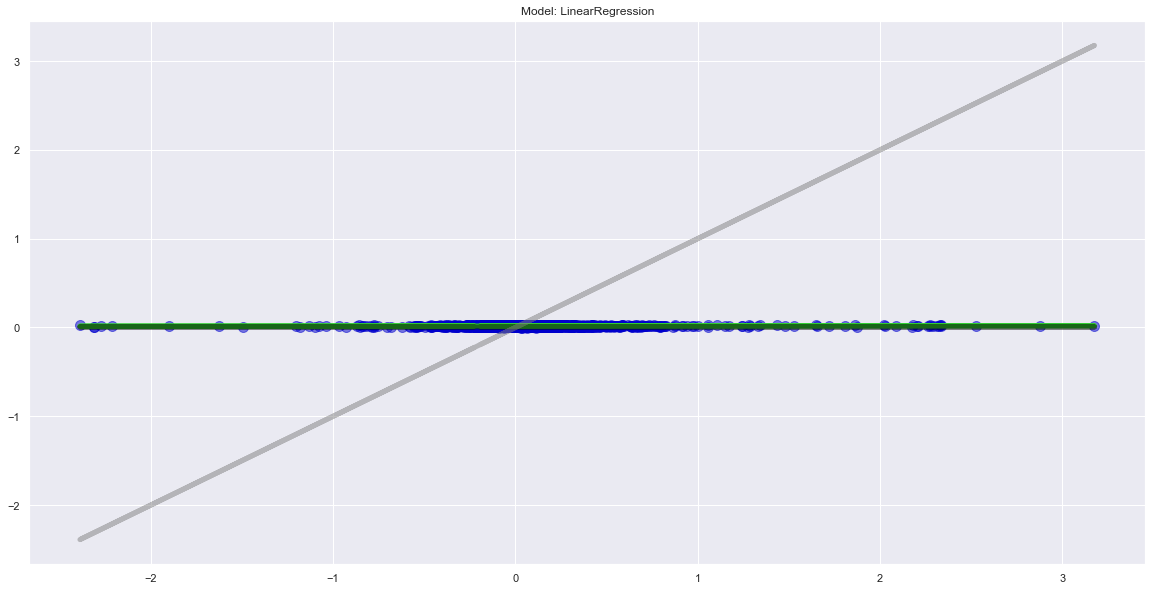

In [27]:
explore.plot_the_OLS(X_train, X_validate, X_test, y_train, y_validate, y_test)



After creating models for:
- Linear Regression
    - In sample: 0.15698
    - Out sample: 0.15186
- LassoLars
    - In sample: 0.01234
    - Out sample:0.01153
- Tweedie Regressor
    - In sample: 0.01234
    - Out sample: 0.01153
- Polynomial with a degree of 2
    - In sample: 0.01228
    - Out sample: 0.01154
- Polynomial with a degree of 3
    - In sample: 0.01228
    - Out sample: 0.01154
    
### We decided to move forward with the Linear Regeression model.

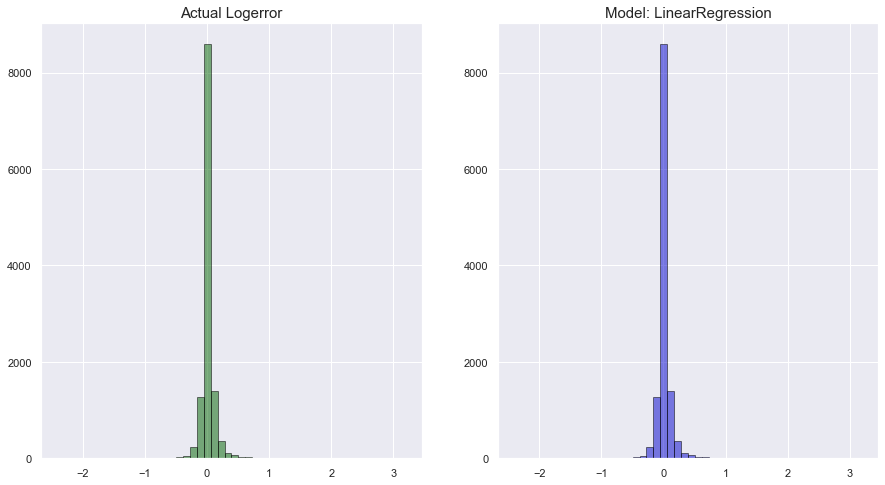

In [28]:
explore.OLS_hist(X_train, y_train, X_validate, y_validate)

In [29]:
explore.OLS_Model(X_train, y_train, X_validate, y_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.15883666313875983 
Validation/Out-of-Sample:  0.16560155983677477


In [30]:
def ols_actual_vs_predicted(X_train, y_train, X_validate, y_validate):
    # y_validate.head()
    plt.figure(figsize=(16,8))
    plt.plot(y_validate.logerror, y_validate.logerror_pred_median, alpha=.5, color="black", label='_nolegend_')
    plt.annotate("Baseline: Predict Using Median", (16, 9.5))
    plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="black", label='_nolegend_')
    plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)
    plt.scatter(y_validate.logerror, y_validate.logerror_pred_lm3,
                alpha=.5, color="darkturquoise", s=100, label="Model 3rd degree Polynomial")
    plt.legend()
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Where are predictions more extreme? More modest?")
    # plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
    # plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
    plt.show()

___

After testing our model on out of sample data, we found that our model performed better than our baseline.

With an R<sup>2</sup> Baseline Value of -0.004585, we beat it with the R<sup>2</sup> OLS Value with a value of 0.00005159.

This is good. Since we are measuring log error the closer to 0! Our model held up pretty well against all odds.

___

# Conclusions

We found that only about 9.36% of log error was inaccurate. Meaning that it was below -0.15 or above 0.15 rendering it inaccurate. 
- This gave us a small amount to work with. But in the end we were able to create a model to find certain drivers of the inaccurate log error.

Our model performed better than the baseline by a decent amount. With a R baseline of ~-0.0046 and our model performing at ~0.000052. Meaning we were able to get closer to 0 than our baseline.

We found that Ventura, north downtown LA, tax values, home quality, and a homes age affect loerror within their resepective cluster. 

With further time we would like to look further into geographical location and tax values to see if there is a more specific reason for log error.

We recommend using our OLS model to be used within the field, in order to establish a closer zestimate score to what the selling price may be, in order to service our customers even better.



___

## Any Questions?

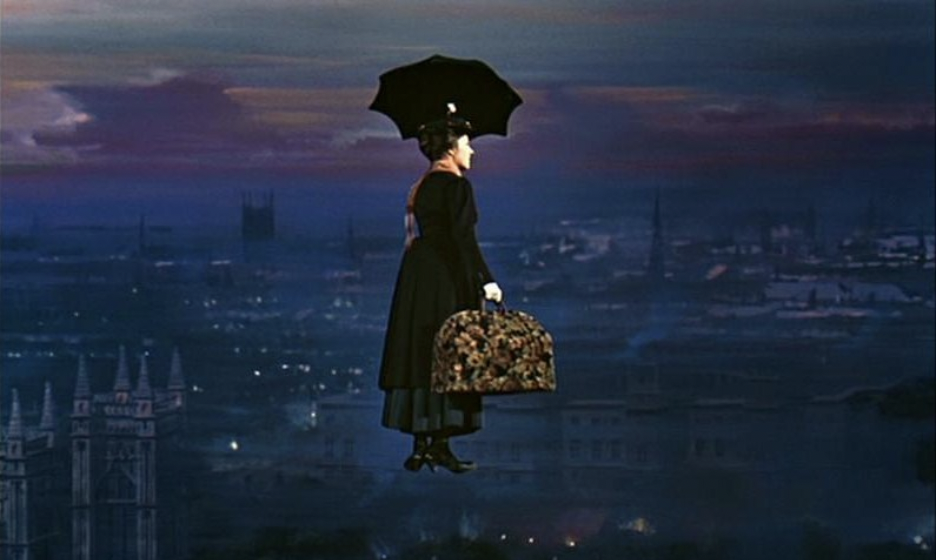